In [295]:
from matplotlib import dates as mpl_dates
import seaborn as sns
import pandas as pd
from adjustText import adjust_text
import matplotlib.font_manager
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%load_ext autotime
%timeit

'''The following report labels the top performing team in each top tier league & it also has the option of adding
specific teams'''

#### Make changes using the following leagues and Metrics #####

Leagues=['ARG Superliga','AUT Bundesliga','BEL Jupiler Pro League','BRA Serie A','CRO HNL','CZE First League','DEN Superliga',
         'ENG Championship','ENG Premier League','ESP La Liga','ESP La Liga 2','FRA Ligue 1','FRA Ligue 2','GER Bundesliga',
         'GER Bundesliga 2','GRE Super League','ITA Serie A','ITA Serie B','MLS US Soccer','NED Eredivisie','POL Ekstraklasa',
         'POR Primeira Liga','RUS Premier League','SCO Premiership','SUI Super League','SWE Allsvenskan','TUR Super Lig',
         'UEFA Champions League','UEFA Europa League','UKR Premier League']
Metrics=['Minutes_mean','Distance_mean','Running Distance_mean','HSR Distance_mean','Sprinting Distance_mean','Count HSR_mean',
         'Count Sprint_mean','Count Acceleration_mean','Count Deceleration_mean','Minutes TIP_mean','Distance TIP_mean',
         'Running Distance TIP_mean','HSR Distance TIP_mean','Sprinting Distance TIP_mean','Count HSR TIP_mean','Count Sprint TIP_mean',
         'Count Acceleration TIP_mean','Count Deceleration TIP_mean', 'Minutes OTIP_mean','Distance OTIP_mean','Running Distance OTIP_mean',
         'HSR Distance OTIP_mean','Sprinting Distance OTIP_mean','Count HSR OTIP_mean','Count Sprint OTIP_mean','Count Acceleration OTIP_mean',
         'Count Deceleration OTIP_mean','HI Count_mean','HIDistance_mean','Mmin_mean','HI Mmin_mean','MMin TIP_mean','HI Distance TIP_mean',
         'HI Count TIP_mean','HI MMin TIP_mean','MMin OTIP_mean','HI Distance OTIP_mean','HI Count OTIP_mean','HI MMin OTIP_mean','PSV-99_mean']

class league_summary_report():
    
    def __init__(self):
        
        self.year='2020'
        self.fig_text=0.30
        self.main_header = "Av. Team Sprinting Distance by Competition"
        self.metric='Sprinting Distance_mean'
        self.cols=['League','Team','Sprinting Distance_mean']
        self.sort_cols=['League','Sprinting Distance_mean']
        self.adjustable=121
        self.y_label='Av. Sprinting Distance P90 (m)'
        self.sub_header='2020/21 Season'
        self.sc_image_loc=r'C:\Users\Home\Pictures'
        self.leagues=['ENG Premier League','UEFA Champions League','CZE First League','POL Ekstraklasa',
                      'ITA Serie A','GER Bundesliga','ENG Championship','UEFA Europa League',
                     'SUI Super League','BEL Jupiler Pro League']
        self.teams=[]
        

    def league_summary(self):

        ### Read the pandas sheet from summary file ###

        xls = pd.ExcelFile(r'C:\Users\Home\Documents\Skill Corner\Comparison P900 Team Level\P900_'+str(self.year)+'.xlsx')
        Team_Average = pd.read_excel(xls, 'Team_Average')


        #### Choose Specific Leagues or Specific Teams ####
        SD=Team_Average[self.cols]
        SD_gb=SD.sort_values(by=self.sort_cols, ascending=[True,False]).drop_duplicates(subset=['League'], keep='first').reset_index(drop=True)
        
        SD_gb=SD_gb[(SD_gb['League'].isin(self.leagues))|(SD_gb['Team'].isin(self.teams))].reset_index(drop=True)


        # Unique category labels
        color_labels = SD['League'].unique()

        # List of RGB triplets
        rgb_values = sns.color_palette("tab10", 32)

        # Map label to RGB
        color_map = dict(zip(color_labels, rgb_values))


        font = FontProperties()
        csfont = {'fontfamily':'Montserrat'}
        plt.rcParams['font.family'] = 'Montserrat'

        text_color = "white"
        Background = "#0C1B37"
        Background_pop = "#80CBA2"
        Target= "#F6C243"
        Comp_benchmark="#5B9BCB"

        plt.rcParams['xtick.color'] = text_color
        plt.rcParams['ytick.color'] = text_color
        plt.rcParams['xtick.labelsize'] = 20
        plt.rcParams['ytick.labelsize'] = 20


        fig, ax = plt.subplots(figsize=(25,10))


        fig.set_facecolor(Background)
        ax.patch.set_alpha(0)

        #### Adding the scatter point labels ####
        text_color='white'

        x1 = SD_gb['League']
        y1 = SD_gb[self.metric]
        o1 = SD_gb['Team']

        ### Adding League Average vs Time ###
        ax=plt.scatter('League', self.metric, data=SD,zorder=100, c=SD['League'].map(color_map))

        ax=sns.barplot(x='League', y=self.metric, data=SD, color='#80CBA7',zorder=1)

        for i, txt in enumerate(o1):
            t= ax.annotate(txt, (x1[i], y1[i]+self.adjustable),color='w', weight='bold', ha='center', va='top', size=9,**csfont,zorder=5,
                        bbox=dict(facecolor='black', edgecolor='none', pad=5))
            #adjust_text(t)


        #### Setting the axis labels ####
        plt.xticks(rotation=90,fontweight='bold')
        ax.set_ylabel(self.y_label, **csfont, fontweight="bold", fontsize=22, color=text_color,labelpad=20)

        ax.tick_params(axis='both', which='major', labelsize=14)
        ax.tick_params(axis='both', which='minor', labelsize=14)

        #### Hiding the spines of the patch added ####

        spines = ["top","right","bottom","left"]
        for s in spines:
            if s in ["top","right"]:
                ax.spines[s].set_visible(False)
            else:
                ax.spines[s].set_color(text_color)


        fig.text(self.fig_text,0.95,self.main_header,fontweight="bold", fontsize=26,**csfont, color=text_color)
        fig.text(0.45,0.915,self.sub_header,fontweight="bold", fontsize=18,**csfont, color=text_color)

        #### Adding Skill corner badge ####
        ax2 = fig.add_axes([0.02,0.9,0.17,0.1]) # badge
        img = mpimg.imread(str(self.sc_image_loc)+'\skillcorner.jpg')
        ax2.imshow(img)


        ### Turn off the grids ###
        ax.grid(False)
        ax2.axis("off")
        plt.axis("off")


The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 49 ms


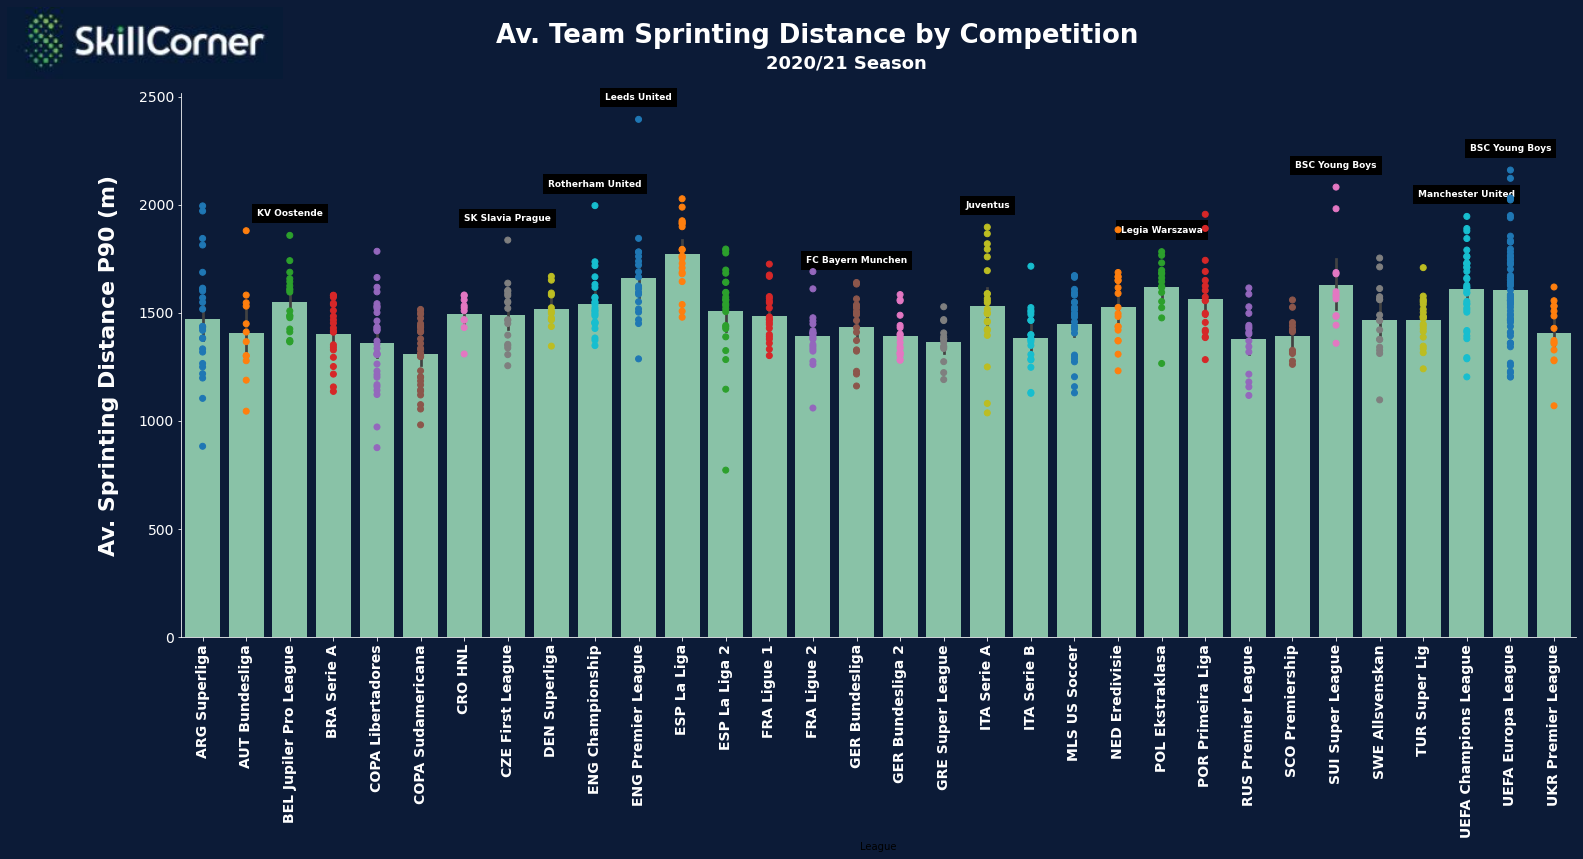

time: 12.4 s


In [296]:
p=league_summary_report()

p.league_summary()